## 降低维度

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
y = iris.target

In [3]:
x.shape

(150, 4)

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(x)
x_reduced = pca.transform(x)
x_reduced.shape

(150, 2)

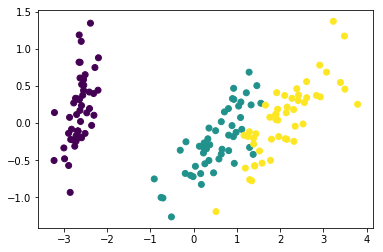

In [8]:
from matplotlib import pyplot as plt
plt.scatter(x_reduced[:,0],x_reduced[:,1],c = y)
plt.show()

In [11]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [10]:
for component in pca.components_:
    print(" + ".join("%.3f x %s" %(value,name) for value,name in zip(component,iris.feature_names)))

0.362 x sepal length (cm) + -0.082 x sepal width (cm) + 0.857 x petal length (cm) + 0.359 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.176 x petal length (cm) + -0.075 x petal width (cm)


## 变异数解释量

In [15]:
# pca.explained_variance_ratio_
pca.explained_variance_

array([4.22484077, 0.24224357])

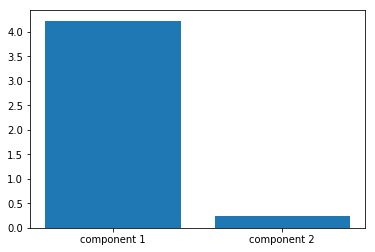

In [12]:
plt.bar(range(0,2),pca.explained_variance_)
plt.xticks(range(0,2),['component 1','component 2'])
plt.show()

In [17]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(x_reduced,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
def plot_estimator(estimator,x,y):
    x_min,x_max = x[:,0].min() -1,x[:,0].max() + 1
    y_min,y_max = x[:,1].min() -1,x[:,1].max() + 1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))
    
    z = estimator.predict(np.c_[xx.ravel(),yy.ravel()])
    z = z.reshape(xx.shape)
    
    plt.plot()
    plt.contourf(xx,yy,z,alpha = 0.4,cmap = plt.cm.RdYlBu)
    plt.scatter(x[:,0],x[:,1],c = y, cmap = plt.cm.brg)
    plt.xlabel('Component1')
    plt.ylabel('Component2')
    plt.show()

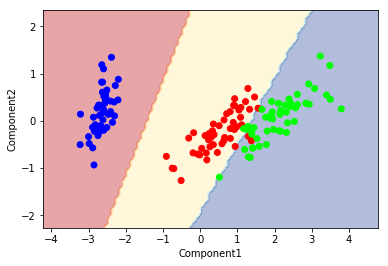

In [28]:
plot_estimator(clf,x_reduced,y)